In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg

## Matrix operations  in NumPy

If we define a vector and matrix, we can multiply them explicitly, but it is better to use NumPy routines.

In [2]:
n = 30000
A = np.zeros((n, n))
x = np.zeros(n)

In [3]:
def explicit(A=None, x=None):
    n = A.shape[0]
    b = np.zeros(n)
    for i in np.arange(n):
        b[i] = (A[i, :] * x).sum()
    return(b)

In [4]:
%timeit b = explicit(A=A, x=x)

1 loop, best of 3: 1.5 s per loop


In [5]:
%timeit b = A.dot(x)

1 loop, best of 3: 334 ms per loop


One can also make outer products and other operations with NumPy arrays.

In [10]:
x = np.zeros(100)
q = np.zeros(50)
y = np.outer(x, q)
print(y.shape)

(100, 50)


And the numpy.linalg module contains a plethora of other operations.

In [11]:
y = np.zeros((100, 100))
print(linalg.det(y))

0.0


## Solving a linear system

In [32]:
n = 20
A = np.random.random((20, 20))
x_actual = np.random.random(20)

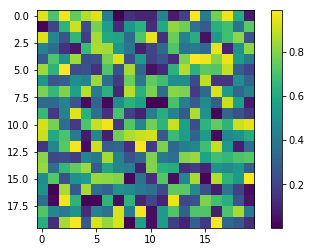

In [33]:
plt.imshow(A)
plt.colorbar()

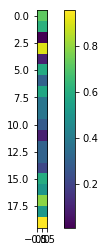

In [34]:
plt.imshow(x_actual.reshape((20, 1)))
plt.colorbar()

In [35]:
b = A.dot(x_actual)

In [36]:
x = linalg.solve(A, b).reshape(n)

In [37]:
print(x)

[ 0.71999958  0.61592846  0.00944744  0.90218934  0.09502431  0.58581859
  0.3095642   0.57030069  0.38079224  0.37816019  0.2789396   0.0908622
  0.31026377  0.3085162   0.21491598  0.59246296  0.51043701  0.78970687
  0.51542921  0.95314045]


In [39]:
print(x - x_actual)

[  1.77635684e-15  -2.55351296e-15  -2.63851441e-15   1.22124533e-15
   2.56739074e-15   1.99840144e-15   1.94289029e-15   1.11022302e-15
  -2.88657986e-15   1.66533454e-15   1.44328993e-15  -3.33066907e-15
  -3.33066907e-16  -4.16333634e-15  -4.57966998e-15   3.10862447e-15
  -3.88578059e-15   9.32587341e-15  -7.32747196e-15   4.66293670e-15]


We can also solve this by explicitly taking the inverse. If we are going to need to solve the equation more than $N$ times, this becomes worthwhile, because we can just calculate and save the inverse, and then apply it, rather than performing the backsubstitution explicitly every time.

In [41]:
Ainv = linalg.inv(A)
x = Ainv.dot(b)
print(x - x_actual)

[  1.01030295e-14   2.22044605e-15  -5.10702591e-15  -3.21964677e-15
   9.99200722e-16  -2.88657986e-15  -1.99840144e-15   4.77395901e-15
   2.22044605e-15  -1.03250741e-14   4.77395901e-15   7.21644966e-15
  -9.99200722e-16  -5.88418203e-15  -4.10782519e-15   5.55111512e-16
   2.77555756e-15  -5.55111512e-16   8.88178420e-15  -4.21884749e-15]


## Trapezoid method for integration

In [46]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = -1
A[1, 0] = -1
A[1, 1] = 1
print(A)

[[ 1. -1.]
 [-1.  1.]]


In [47]:
x = np.random.normal(size=(2, 1000))
b = A.dot(x)

(2, 1000)


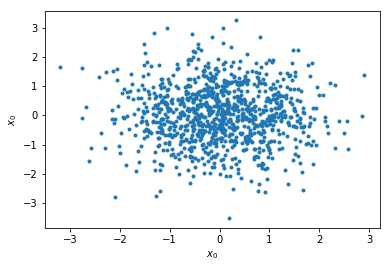

In [49]:
plt.plot(x[0, :], x[1, :], '.')
plt.xlabel("$x_0$")
plt.ylabel("$x_0$")

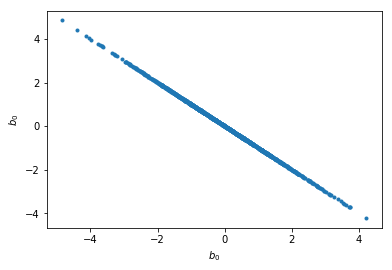

In [50]:
plt.plot(b[0, :], b[1, :], '.')
plt.xlabel("$b_0$")
plt.ylabel("$b_0$")

In [51]:
print(np.linalg.svd(A))

(array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]]), array([ 2.,  0.]), array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]]))
